# Your name:

# Gaussian mixture model: EM vs VI


We consider two algorithms for inference in the Gaussian mixture model: expectation maximization (EM) and mean-field variational inference (VI).

In both cases, we deal with a mixture of $K$ real-valued normalized Gaussian random variables. We assume that $K$ is known and for simplicity that the variances of the Gaussian distributions are all equal to one.There are $n$ observations denoted by $x=(x_1,\dots, x_n)\in \mathbb{R}^n$. The weights of the mixture as well as the mean of each Gaussian distribution is not known and need to be estimated.

Note: you can read Sections 1 and 2 independently (as a result some notations are repeated).

## 1. Expectation Maximization

**setting:**
- $\mu=(\mu_1,\dots, \mu_K)\in \mathbb{R}^K$
- $p(c=k) = \pi_k$ with $\pi =(\pi_1,\dots, \pi_K)$ and $\sum_k \pi_k =1$, $\pi_k\geq 0$
- parameter $\theta=(\mu,\pi)$
- Gaussian distribution with normalized variance and mean $m$: $f_m(x) = \frac{1}{\sqrt{2\pi}}\exp\left(-\frac{1}{2}(x-m)^2 \right)$.
- Gaussian mixture model: for $x=(x_1,\dots, x_n)\in \mathbb{R}^n$ and $c = (c_1,\dots c_n)\in [K]^n$, we have $p_{\theta}(x,c) = \prod_{i=1}^n \pi_{c_i} f_{\mu_{c_i}}(x_i)$

Likelihood (we observe only $x$ and not the classes given by $c$)
\begin{align*}
\ell(\theta) &= \ln p_\theta(x) = \ln \sum_{c\in [K]^n} p_\theta(x,c)
\end{align*}
which is hard to maximize in $\theta=(\mu,\pi)$.

**ELBO**
\begin{align*}
\ell(\theta) &= \sum_{c\in [K]^n} q(c) \ln  p_\theta(x)\\
&= \sum_{c\in [K]^n} q(c) \ln \frac{p_\theta(x,c)q(c)}{p_{\theta}(c|x)q(c)}\\
&= \sum_{c\in [K]^n} q(c) \ln \frac{p_\theta(x,c)}{q(c)} + \sum_{c\in [K]^n} q(c) \ln \frac{q(c)}{p_{\theta}(c|x)}\\ 
&= \text{ELBO}(q)+\text{KL}\left(q(c)\| p_\theta(c|x)\right)
%&= \sum_{c\in [K]^n} q(c|x) \ln p_\theta(x,c) + H(q(c|x))
%&\geq \sum_{c\in [K]^n} q(c|x) \ln p_\theta(x,c) 
\end{align*}

Note that for $q(c) = p_{\theta}(c|x)$, we get $\text{KL}\left(p_{\theta}(c|x)\| p_\theta(c|x)\right)=0$, so that $\text{ELBO}(p_{\theta}(c|x)) =\ell(\theta)$.
Now for an estimate $\theta_t$ of the parameter, we take $q(c) = p_{\theta_t}(c|x)$ and define
\begin{align*}
\ell(\theta|\theta_t)\stackrel{\Delta}{=} \sum_{c\in [K]^n} p_{\theta_t}(c|x) \ln \frac{p_\theta(x,c)}{p_{\theta_t}(c|x)}, %= \text{ELBO}( p_{\theta_t}(c|x)),
\end{align*}
so that by previous argument, we have
\begin{align*}
\ell(\theta|\theta_t) = \ell(\theta)-\text{KL}\left(p_{\theta_t}(c|x)\| p_\theta(c|x)\right),
\end{align*}
in particular, we see that $\ell(\theta|\theta_t) \leq  \ell(\theta)$ and $\ell(\theta_t|\theta_t) = \ell(\theta_t)$.

**EM algorithm:**
- E-step: compute $p_{\theta_t}(c|x)$
- M-step: maximize in $\theta$, $\theta_{t+1}=\arg\max_{\theta}\ell(\theta|\theta_t)=\arg\max_{\theta}\sum_{c\in [K]^n} p_{\theta_t}(c|x) \ln {p_\theta(x,c)}$

**Properties of EM:** the sequence of log-likelihoods $(\ell(\theta_t))_{t\geq 0}$ is non-decreasing and thus converges.

The proof is easy: note that by applying the equality above for $\theta=\theta_{t+1}$, we get
\begin{align*}
\ell(\theta_{t+1}|\theta_t) = \ell(\theta_{t+1})-\text{KL}\left(p_{\theta_t}(c|x)\| p_{\theta_{t+1}}(c|x)\right)\leq \ell(\theta_{t+1}),
\end{align*}
so that we have
\begin{align*}
\ell(\theta_{t+1}) \geq \ell(\theta_{t+1}|\theta_t) \geq \ell(\theta_{t}|\theta_t) = \ell(\theta_t)
\end{align*}

We now need to derive the EM algorithm for the GMM.

**Question 1**
Show that for a parameter $\theta =(\mu, \pi)$ and $x\in \mathbb{R}^n$, we have:
\begin{align*}
p_{ik}(\theta,x) &\stackrel{\Delta}{=} p_{\theta}(c_i=k|x_i)\\
& = \frac{\pi_k(\theta) \exp\left( -\frac{1}{2}(x_i-\mu_k(\theta))^2\right)}{\sum_\ell \pi_\ell(\theta) \exp\left( -\frac{1}{2}(x_i-\mu_\ell(\theta))^2\right)},
\end{align*}
with a slight abuse of notation where $\theta= (\mu(\theta),\pi(\theta))$.

<font color='red'>R1:</font> Follows from definitions.

**Question 2**
We define
\begin{align*}
n_{k}(\theta, x) = \sum_{i=1}^n p_{ik}(\theta,x).
\end{align*}

Derive the **EM for Gaussian mixture**
- **Expectation** given $\theta_t$ and the samples $x=(x_1,\dots, x_n)$, compute for all $i\in [n]$ and $k\in [K]$:
\begin{align*}
p_{ik}(\theta_t,x) & = ???
\end{align*}
- **Maximization** given $\theta_t$ and the samples $x=(x_1,\dots, x_n)$, the parameter $\theta_{t+1}$ maximizing $\ell(\theta|\theta_t)$ is given by
\begin{align*}
\pi_k(\theta_{t+1}) &= ???\\
\mu_k(\theta_{t+1}) &= ???
\end{align*}

<font color='red'>R2:</font>
We have (we denote by $\mathbb{E}_{\theta_t, c|x}$ the expectation with respect to $p_{\theta_t}(c|x)$):
\begin{align*}
\ell(\theta|\theta_t) &= \mathbb{E}_{\theta_t, c|x}\left[ \ln \prod_{i=1}^n \left(\pi_{c_i}(\theta) f_{\mu_{c_i}(\theta)}(x_i)\right) \right]+ H(p_{\theta_t}(c|x)) \\
%\sum_{\gamma\in [K]^n} \prod_{i=1}^n p_{i\gamma_i}(\theta_t,x) \ln \prod_{i=1}^n \left(\pi_{\gamma_i}(\theta) f_{\mu_{\gamma_i}(\theta)}(x_i)\right)+ H(p_{\theta_t}(c|x)) \\
&= \mathbb{E}_{\theta_t, c|x}\left[ \sum_{i=1}^n \left(\ln  \pi_{c_i}(\theta) - \frac{1}{2}(x_i-\mu_{c_i}(\theta))^2\right) \right]+ H(p_{\theta_t}(c|x))+\text{cst}\\
%\sum_{\gamma\in [K]^n} \prod_{i=1}^n p_{i\gamma_i}(\theta_t,x) \left(\sum_{i=1}^n \left(\ln  \pi_{\gamma_i}(\theta) - \frac{1}{2}(x_i-\mu_{\gamma_i}(\theta))^2\right)\right)+ H(p_{\theta_t}(c|x)) +\text{cst}\\
&= \sum_{i=1}^n\mathbb{E}_{\theta_t, c|x}\left[ \ln  \pi_{c_i}(\theta) - \frac{1}{2}(x_i-\mu_{c_i}(\theta))^2\right]+ H(p_{\theta_t}(c|x))+\text{cst}
\end{align*}

Hence we get
\begin{align*}
\ell(\theta|\theta_t) = \sum_{k=1}^K \sum_{i=1}^n p_{ik}(\theta_t,x)\left(\ln \pi_{k}(\theta) - \frac{1}{2}(x_i-\mu_k(\theta))^2 \right) + H(p_{\theta_t}(c|x)) +\text{cst}
\end{align*}
Note that only the first term depends on $\theta$ and hence matters for maximizing $\ell(\theta|\theta_t)$ as a function of $\theta$.
so that
\begin{align*}
\ell(\theta|\theta_t) = \sum_{k=1}^K n_{k}(\theta_t, x)\ln \pi_{k}(\theta) - \frac{1}{2}\sum_{k=1}^K \sum_{i=1}^n p_{ik}(\theta_t,x)(x_i-\mu_k(\theta))^2 + \text{cst}(\theta).
\end{align*}
We can optimize both terms separately and we get for $\theta_{t+1}$:
\begin{align*}
\pi_k(\theta_{t+1}) &= \frac{n_{k}(\theta_t, x)}{n}\\
\mu_k(\theta_{t+1}) &= \frac{\sum_{i=1}^n p_{ik}(\theta_t,x)x_i}{n_{k}(\theta_t, x)}
\end{align*}

**EM for Gaussian mixture**
- **Expectation** given $\theta_t$ and the samples $x=(x_1,\dots, x_n)$, compute for all $i\in [n]$ and $k\in [K]$:
\begin{align*}
p_{ik}(\theta_t,x) & = \frac{\pi_k(\theta_t) \exp\left( -\frac{1}{2}(x_i-\mu_k(\theta_t))^2\right)}{\sum_\ell \pi_\ell(\theta_t) \exp\left( -\frac{1}{2}(x_i-\mu_\ell(\theta_t))^2\right)}
\end{align*}
- **Maximization** given $\theta_t$ and the samples $x=(x_1,\dots, x_n)$, the parameter $\theta_{t+1}$ maximizing $\ell(\theta|\theta_t)$ is given by
\begin{align*}
\pi_k(\theta_{t+1}) &= \frac{n_{k}(\theta_t, x)}{n}\\
\mu_k(\theta_{t+1}) &= \frac{\sum_{i=1}^n p_{ik}(\theta_t,x)x_i}{n_{k}(\theta_t, x)},
\end{align*}
where $n_{k}(\theta_t, x) = \sum_{i=1}^n p_{ik}(\theta_t,x)$.

**Question 3**
Compute $\ell(\theta_t)=\ell(\theta_t|\theta_t)$.

<font color='red'>R3:</font>
we can compute $\ell(\theta_t)=\ell(\theta_t|\theta_t)$ as 
\begin{align*}
\ell(\theta|\theta_t) &= \sum_{k=1}^K n_{k}(\theta_t, x)\ln \pi_{k}(\theta) - \frac{1}{2}\sum_{k=1}^K \sum_{i=1}^n p_{ik}(\theta_t,x)(x_i-\mu_k(\theta))^2 -\frac{n}{2}\ln(2\pi)\\
& -\sum_{i=1}^n\sum_{k=1}^K p_{ik}(\theta_t,x)\ln p_{ik}(\theta_t,x).
\end{align*}

## 2. Mean-field Variational Inference

**setting:**
- $\mu=(\mu_1,\dots, \mu_K)\in \mathbb{R}^K$ with prior $p(\mu_k)=\mathcal{N}(\mu_k|0,\sigma^2)$ and $p(\mu)= \prod_k p(\mu_k)$.
- $p(c=k) = \pi_k$ with $\pi =(\pi_1,\dots, \pi_K)$ and $\sum_k \pi_k =1$, $\pi_k\geq 0$ with a Dirichlet prior $p(\pi)=C(\alpha)\prod_{k=1}^K\pi_k^{\alpha-1}$, with $C(\alpha) = \frac{\Gamma(K\alpha)}{\Gamma(\alpha)^K}$.
- Gaussian distribution with normalized variance and mean $m$: $f_m(x) = \frac{1}{\sqrt{2\pi}}\exp\left(-\frac{1}{2}(x-m)^2 \right)$.
- Gaussian mixture: for $x=(x_1,\dots, x_n)\in \mathbb{R}^n$ and $c = (c_1,\dots c_n)\in [K]^n$, we have $p(x,c,\mu,\pi) = p(\mu)p(\pi)\prod_{i=1}^n \pi_{c_i} f_{\mu_{c_i}}(x_i)$

Hence, the evidence is
\begin{align*}
p(x) = \sum_{c\in [K]^n} \int_{\mu,\pi} p(\mu)p(\pi)\prod_{i=1}^n \pi_{c_i} f_{\mu_{c_i}}(x_i) d\mu d\pi = \int_{\mu,\pi} p(\mu)p(\pi)\prod_{i=1}^n\sum_{c_i\in[K]} \pi_{c_i} f_{\mu_{c_i}}(x_i) d\mu d\pi
\end{align*}

**ELBO**


\begin{align*}
\ln p(x) &= \sum_c\int_{\mu,\pi} q(\mu,\pi,c)\ln \frac{p(x,c,\mu,\pi)}{p(c,\mu,\pi|x)} d\mu d\pi\\
&= \sum_c\int_{\mu,\pi} q(\mu,\pi,c)\ln \frac{p(x,c,\mu,\pi)}{q(\mu,\pi,c)}-\sum_c\int_{\mu,\pi} q(\mu, \pi,c)\ln \frac{p(c,\mu, \pi|x)}{q(\mu, \pi,c)}\\
&= \text{ELBO}(q)+\text{KL}\left( q(\mu,\pi,c)\| p(c,\mu,\pi|x)\right)
\end{align*}

**Maximizing ELBO with a mean-field distribution**

We are considering now factorized distributions for $q$:
\begin{align*}
q(\mu,\pi,c) = q(\mu,\pi)q(c).
\end{align*}

We have for the factor $q(\mu,\pi)$:
\begin{align*}
\text{ELBO}(q) &= \int_{\mu, \pi} q(\mu,\pi)\sum_{c\in [K]^n} q(c)\ln p(x, c,\mu,\pi)d\mu d\pi +H(q(\mu,\pi))+H(q(c))\\
&=\int_{\mu,\pi} q(\mu,\pi)\mathbb{E}_{q(c)}\left[\ln p(x, c,\mu,\pi)\right]d\mu d\pi-\int_{\mu,\pi} q(\mu,\pi)\ln q(\mu,\pi)d\mu d\pi +\text{cst}
\end{align*}

**Question 4** 
When $q(c)$ is fixed (we denote $\varphi_{i}(k) = q(c_i=k)$ the $i$-th marginal of $q$), find the distirbution $q^*(\mu,\pi)$ maximizing ELBO.
(Hint: if you are not familiar with the Dirichlet distribution, have a look at its [definition](https://en.wikipedia.org/wiki/Dirichlet_distribution))

<font color='red'>R4:</font>
\begin{align*}
\ln q^*(\mu,\pi) &= \mathbb{E}_{q(c)} \left[\ln p(x, c,\mu,\pi)\right] + \text{cst}\\
&= \mathbb{E}_{q(c)} \left[\ln  p(\mu)+\ln p(\pi)+\sum_{i=1}^n \ln\left(\pi_{c_i} f_{\mu_{c_i}}(x_i)\right)\right]+ \text{cst}\\
&=-\frac{1}{2\sigma^2}\sum_{k=1}^K  \mu_k^2 + \sum_{k=1}^K (\alpha-1)\ln \pi_k + \sum_{i=1}^n\sum_{k=1}^K \varphi_{i}(k)\left( \ln\pi_k - \frac{1}{2}\left(x_i-\mu_k\right)^2\right)+ \text{cst}\\
&= -\frac{1}{2}\sum_{k=1}^K \left( \frac{\mu_k^2}{\sigma^2} + \sum_{i=1}^n \varphi_{i}(k)\left(\mu_k-x_i\right)^2\right)+ \sum_{k=1}^K \left( \alpha-1+ \sum_{i=1}^n\varphi_i(k) \right)\ln \pi_k+\text{cst}\\
\end{align*}
Hence, we see that $q^*(\mu,\pi) = q^*(\mu)q^*(\pi)$ with $q^*(\mu)=\prod_{k=1}^K \mathcal{N}(\mu_k|m_k,\sigma_k^2)$ with
\begin{align*}
m_k &= \frac{\sum_{i=1}^n \varphi_{i}(k) x_i}{\sigma^{-2}+ \sum_{i=1}^n\varphi_{i}(k)},\\
\sigma_k^2 & = \left( \sigma^{-2}+ \sum_{i=1}^n\varphi_{i}(k) \right)^{-1},
\end{align*}
and $q^*(\pi) = \text{Dir}(\pi| \beta)$ with
\begin{align*}
\beta_k = \alpha+\sum_{i=1}^n\varphi_{i}(k).
\end{align*}

**Question 5**
Similarly maximizing ELBO with $q(\mu,\pi)$ fixed, give the distribution $q^*(c)$. (Hint: the log moment of the [Dirichlet distribution](https://en.wikipedia.org/wiki/Dirichlet_distribution) are given by the [digamma function](https://en.wikipedia.org/wiki/Digamma_function)).

<font color='red'>R5:</font>
\begin{align*}
\ln q^*(c) & = \mathbb{E}_{q(\mu,\pi)}\left[\ln p(x, c,\mu,\pi)\right] + \text{cst}\\
&= \mathbb{E}_{q(\mu,\pi)} \left[\ln  p(\mu)+\ln p(\pi)+\sum_{i=1}^n \ln\left(\pi_{c_i} f_{\mu_{c_i}}(x_i)\right)\right]+ \text{cst}\\
&= \sum_{i=1}^n \mathbb{E}_{q(\pi)}\ln \pi_{c_i}-\frac{1}{2}\sum_{i=1}^n\mathbb{E}_{q(\mu)} \left(x_i-\mu_{c_i}\right)^2+\text{cst}\\
&= \sum_{i=1}^n \left(\mathbb{E}_{q(\pi)}\ln \pi_{c_i}+x_i\mathbb{E}_{q(\mu)}[\mu_{c_i}]-\frac{\mathbb{E}_{q(\mu)}[\mu_{c_i}^2]}{2}\right)+\text{cst}
\end{align*}
Hence, we see that $q^*(c) = \prod_{i=1}^n q(c_i)$, with
\begin{align*}
\varphi_i(k) &= q(c_i=k)\\
&= \frac{\rho_k\exp\left(x_im_k- \frac{\sigma_k^2+m_k^2}{2}\right)}{\sum_\ell \rho_\ell\exp\left(x_im_\ell- \frac{\sigma_\ell^2+m_\ell^2}{2}\right)}\\
&= \frac{\rho_k\exp\left( -\frac{\sigma_k^2}{2}\right)\exp\left(-\frac{(x_i-m_k)^2}{2} \right)}{\sum_\ell \rho_\ell\exp\left( -\frac{\sigma_\ell^2}{2}\right)\exp\left(-\frac{(x_i-m_\ell)^2}{2} \right)}
\end{align*}
with $\ln \rho_k = \mathbb{E}_{q(c)} \ln \pi_k = \psi(\beta_k) - \psi(K\alpha+n)$, where $\psi$ is the [Digamma function](https://en.wikipedia.org/wiki/Digamma_function) (note that $\sum_k\beta_k=K\alpha+n$).

**Question 6** Derive the mean-field VI algorithm.

<font color='red'>R6:</font>
**VI algorithm:** compute for a fixed $(\varphi_i(k)_{k\in [K]})_{i\in [n]}$ the parameters of the distribution $q(\mu,\pi)$ as follows:
\begin{align*}
m_k &= \frac{\sum_{i=1}^n \varphi_{i}(k) x_i}{\sigma^{-2}+\sum_{i=1}^n\varphi_{i}(k)}\\
\sigma_k^2 & = \left(\sigma^{-2}+\sum_{i=1}^n\varphi_{i}(k) \right)^{-1}\\
\beta_k &=\alpha +\sum_{i=1}^n\varphi_{i}(k).
\end{align*}
Then, update the distributions $(\varphi_i(k)_{k\in [K]})_{i\in [n]}$ as follows:
\begin{align*}
\rho_k &= \exp\left( \psi(\beta_k) - \psi(K\alpha + n)\right)\\
\varphi_i(k) &= \frac{\exp\left(\psi(\beta_k)+x_im_k- \frac{\sigma_k^2+m_k^2}{2}\right)}{\sum_\ell \exp\left(\psi(\beta_\ell)+x_im_\ell- \frac{\sigma_\ell^2+m_\ell^2}{2}\right)}
\end{align*}

**Question 7** To compute the ELBO,  we use the following decomposition
\begin{align*}
\text{ELBO}(q) = \underbrace{\mathbb{E}_{q(\mu)q(\pi)}\ln p(\mu)p(\pi)}_{A}+\underbrace{\mathbb{E}_{q(\mu)q(\pi)q(c)}\ln \prod_{i=1}^n\pi_{c_i}f_{\mu_{c_i}}(x_i)}_{B} +H(q(\mu))+H(q(\pi))+H(q(c)).
\end{align*}
Compute each term.

<font color='red'>R7:</font>
We have for the various terms:
\begin{align*}
H(q(\mu)) & =\frac{K}{2}+\frac{1}{2}\sum_{k=1}^K \ln(2\pi\sigma_k^2)\\
H(q(\pi)) & = -\ln C(\beta)+\left(K(\alpha-1)+n\right)\psi(K\alpha+n)-\sum_{k=1}^K (\beta_k-1)\psi(\beta_k)\\
H(q(c)) &= -\sum_{i=1}^n \sum_{k=1}^K\varphi_i(k)\ln\varphi_i(k),
\end{align*}
where $C(\beta) = \frac{\Gamma(K\alpha+n)}{\Gamma(\beta_1)\dots \Gamma(\beta_K)}$.

\begin{align*}
A &= \sum_{k=1}^K\mathbb{E}_{q(\mu)q(\pi)}\left[\frac{-1}{2}\ln (2\pi\sigma^2) -\frac{\mu_k^2}{2} +  \ln(C(\alpha))+(\alpha-1)\ln \pi_k \right]\\
&= -\frac{K}{2}\ln (2\pi\sigma^2) +K\ln C(\alpha) -\sum_{k=1}^K\frac{m_k^2+\sigma_k^2}{2}+(\alpha-1)\sum_{k=1}^K\ln \rho_k
\end{align*}

\begin{align*}
B &= \sum_{i=1}^n \mathbb{E}_{q(\mu)q(\pi)q(c)}\left[ \ln \pi_{c_i}-\frac{1}{2}\ln2\pi -\frac{1}{2}(x_i-\mu_{c_i})^2\right]\\
&= -\frac{n}{2}\ln2\pi + \sum_{i=1}^n\sum_{k=1}^K\varphi_i(k)\left(\ln \rho_k-\frac{1}{2}(x_i^2-2x_im_k+m_k^2+\sigma_k^2) \right)
\end{align*}

**Question 8** Consider the **Uniformative priors** by taking $\sigma^2\to\infty$ and $\alpha \to 0$ and use the fact that as $z\to\infty$, we have $\psi(z) \sim \ln(z)-\frac{1}{2z}$ to show the similarity between EM and VI.

<font color='red'>R8:</font>
\begin{align*}
m_k &= \frac{\sum_{i=1}^n\varphi_i(k) x_i}{\sum_{i=1}^n\varphi_i(k)}\\
\mathbb{E}_{q}[\pi_k] &= \frac{\varphi_i(k)}{n}\\
\beta_k &= \sum_{i=1}^n\varphi_i(k) = \sigma_k^{-2}\\
\varphi_i(k) &= \frac{\exp\left(\psi(\beta_k)-\frac{1}{2\beta_k} -\frac{1}{2}(x_i-m_k)^2 \right)}{\sum_\ell \exp\left(\psi(\beta_\ell)-\frac{1}{2\beta_\ell} -\frac{1}{2}(x_i-m_\ell)^2\right)},
\end{align*}
which are updates very similar to the EM algorithm. In particular, note that as $z\to\infty$, we have $\psi(z) \sim \ln(z)-\frac{1}{2z}$ so that we get
\begin{align*}
\varphi_i(k) &\approx \frac{\beta_k\exp\left(-\frac{1}{2}(x_i-m_k)^2 \right)}{\sum_\ell \beta_\ell\exp\left( -\frac{1}{2}(x_i-m_\ell)^2\right)},
\end{align*}
which are exactly the updates of EM.

# 3. Code

We now code both algorithms.

The code below, will produce data for a simple mixture of 2 Gaussian distributions.

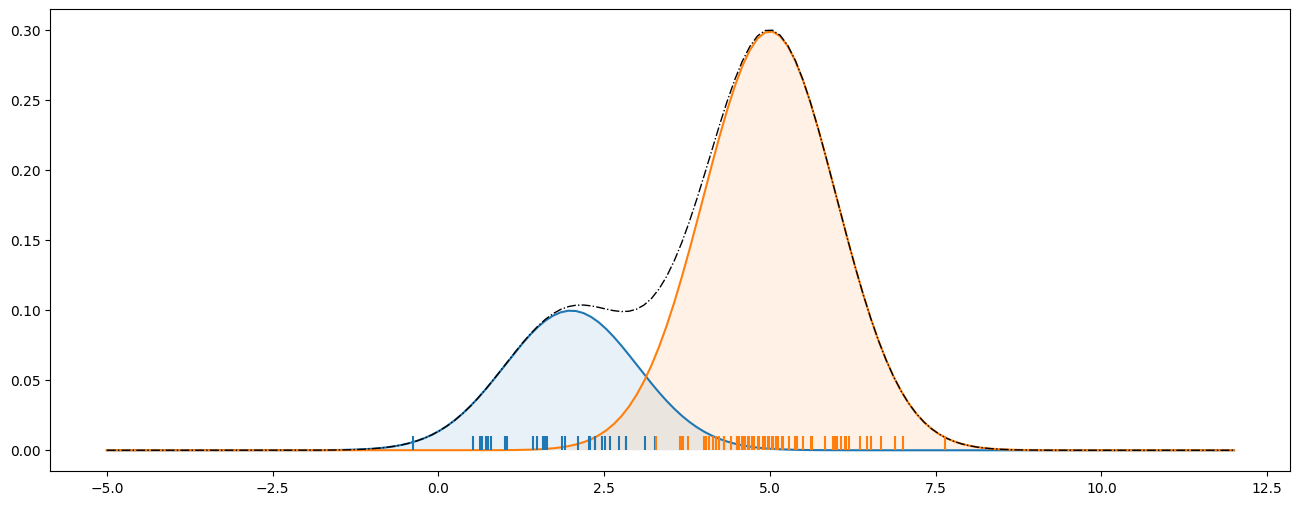

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats
from scipy.special import psi, gamma

np.random.seed(654)
# Draw samples from two Gaussian w.p. c_i ~ Bernoulli(p)
p = 0.75
ps = [p, 1-p]
mus = [2, 5]
generative_m = np.array([stats.norm(mus[0], 1), stats.norm(mus[1], 1)])
c_i = stats.bernoulli(p).rvs(100)
x_i = np.array([g.rvs() for g in generative_m[c_i]])

# plot generated data and the latent distributions
x = np.linspace(-5, 12, 150)
plt.figure(figsize=(16, 6))
plt.plot(x, (1-p)*generative_m[0].pdf(x))
plt.plot(x, p*generative_m[1].pdf(x))
plt.plot(x, (1-p)*generative_m[0].pdf(x) + p*generative_m[1].pdf(x), lw=1, ls='-.', color='black')
plt.fill_betweenx((1-p)*generative_m[0].pdf(x), x, alpha=0.1)
plt.fill_betweenx(p*generative_m[1].pdf(x), x, alpha=0.1)
plt.vlines(x_i, 0, 0.01, color=np.array(['C0', 'C1'])[c_i])

General rule: try to avoid for loop and use broadcasting as much as possible. It makes your code more efficient and less prone to errors...

In [2]:
# Here are some examples using broadcasting:
z = np.random.normal(size=(2,5))
w = np.random.normal(size=2)

In [3]:
z.shape

(2, 5)

In [4]:
w.shape

(2,)

In [5]:
(w[:,np.newaxis]).shape

(2, 1)

In [6]:
(z*w[:,np.newaxis]).shape

(2, 5)

In [7]:
# do not do this:
res = np.zeros(2)
for i in range(2):
    res[i] = np.sum(z[i,:]*w[i])
res

array([ 0.02034857, -0.02583676])

In [8]:
# instead do this:
(z*w[:,np.newaxis]).sum(1)

array([ 0.02034857, -0.02583676])

In [9]:
(z*w[:,np.newaxis]).sum(0)

array([-0.79386331,  1.46279674, -0.72906848,  1.06800665, -1.01335978])

## 3.1 EM algorithm

Complete the code below.

In [10]:
class EM:
    def __init__(self, k):
        self.k = k # number of clusters
        self.n = None
        self.mu = None # (k,)
        self.p_ik = None # (k,n)
        self.pi = None # (k,)
        self.lb = [] # to keep track of the lower bound
        self.x = None # to store the data

    def expectation_step(self):
        self.p_ik = np.exp(-1/2*(self.x[np.newaxis,:]-self.mu[:,np.newaxis])**2) * self.pi[:,np.newaxis]
        self.p_ik /= self.p_ik.sum(0)

    def maximization_step(self):
        self.pi = self.p_ik.mean(1)
        self.mu = (self.p_ik * self.x).sum(1) / self.p_ik.sum(1)
        
    def lower_bound(self):
        first = np.sum(self.p_ik.sum(1)*np.log(self.pi))
        second = np.sum(0.5*(self.p_ik * (self.x[np.newaxis,:]-self.mu[:,np.newaxis])**2))
        third = -np.sum(self.p_ik * np.log(self.p_ik))
        return first+second+third-self.n/2*np.log(2*math.pi)

    def fit(self, x):
        self.x = x
        self.n = x.shape[0]
        self.mu = np.random.uniform(x.min(), x.max(), size=self.k)
        self.p_ik = np.zeros((self.k, self.n))
        self.pi = np.ones(self.k) / self.k

        i = -1
        while ( i<6 or ~np.isclose(self.lb[i-5], self.lb[i])):
            #last_mu = self.mu
            self.expectation_step()
            self.maximization_step()
            self.lb.append(self.lower_bound())
            i+=1
        return self.lb

In [11]:
em = EM(2)
lb = em.fit(x_i)

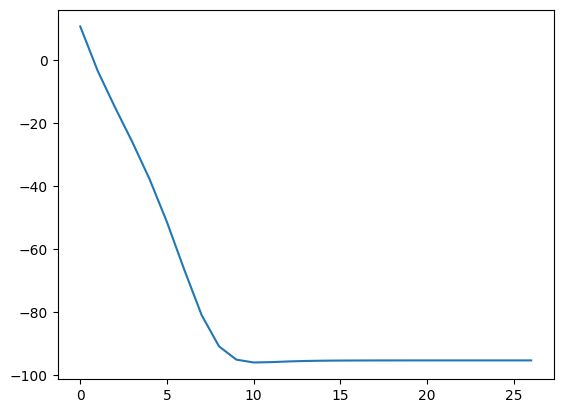

In [12]:
# plot the lower bound
plt.plot(lb)

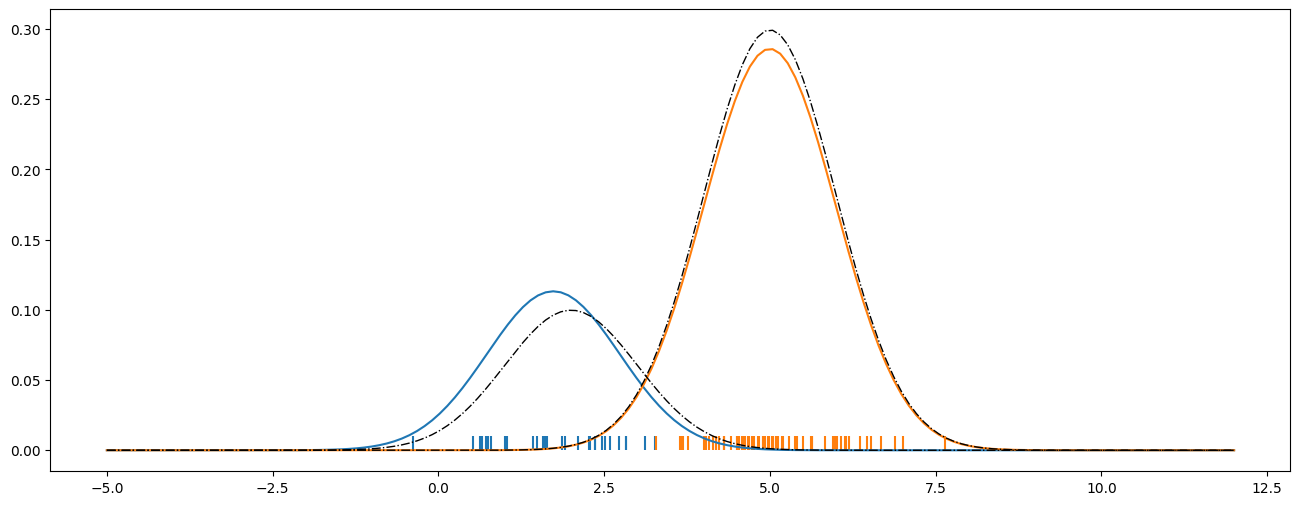

In [13]:
# this should display the fitted distribution
fitted_m = [stats.norm(mu, 1) for mu in em.mu]
fitted_p = em.pi

if fitted_p[0] > fitted_p[1]:
    fitted_p = fitted_p[::-1]
    fitted_m = fitted_m[::-1]

plt.figure(figsize=(16, 6))
plt.vlines(x_i, 0, 0.01, color=np.array(['C0', 'C1'])[c_i])
plt.plot(x, fitted_p[0]*fitted_m[0].pdf(x))
plt.plot(x, fitted_p[1]*fitted_m[1].pdf(x))
plt.plot(x, (1-p)*generative_m[0].pdf(x), color='black', lw=1, ls='-.')
plt.plot(x, p*generative_m[1].pdf(x), color='black', lw=1, ls='-.')

## 3.2 VI algorithm

Complete the code below.

In [14]:
# these functions should be useful to compute the ELBO
def my_beta(b):
    return gamma(np.sum(b))/np.prod(gamma(b))

def my_C(a,k):
    return gamma(k*a)/np.float_power(gamma(a),k)

In [15]:
class VI:
    def __init__(self,k, prec=0.0001, alpha=0.0001):
        self.k = k
        self.n = None 
        self.means = None # (k,)
        self.vars = None # (k,)
        self.phi = None # (k,n)
        self.beta = None # (k,)
        self.rho = None # (k,)
        self.norm_rho = 0 # see definition in function fit
        self.prec = prec # precision for the Gaussian prior
        self.alpha= alpha # alpha for the Dirichlet prior
        self.lb = [] # to keep track of the lower bound
        self.x = None # to store the data
        
    def update_mu_pi(self):
        self.beta = self.alpha + self.phi.sum(1)
        self.vars = 1/(self.prec + self.phi.sum(1))
        self.means = (self.phi*self.x[np.newaxis,:]).sum(1)*self.vars
                        
    def update_phi_rho(self):
        self.rho = np.exp(psi(self.beta))*self.norm_rho
        self.phi = self.rho[:,np.newaxis]*np.exp(self.x[np.newaxis,:]*self.means[:,np.newaxis]\
                                                 -0.5*(self.vars[:,np.newaxis]+self.means[:,np.newaxis]**2))
        self.phi /= self.phi.sum(0)
        
    def lower_bound(self):
        entrop1 = self.k/2+0.5*np.sum(np.log(2*math.pi*self.vars))
        entrop2 = -np.log(my_beta(self.beta))+(self.k*(self.alpha-1)+self.n)*psi(self.k*self.alpha+self.n)\
                -np.sum((self.beta-1)*psi(self.beta))
        entrop3 = -np.sum(self.phi*np.log(self.phi))
        A = -self.k/2*np.log(2*math.pi) +self.k/2*np.log(self.prec)\
            +self.k*np.log(my_C(self.alpha,self.k))\
            -0.5*np.sum(self.means**2+self.vars)+(self.alpha-1)*np.sum(np.log(self.rho))
        B = -self.n*np.log(2*math.pi) + np.sum(self.phi*(np.log(self.rho)[:,np.newaxis]
                   -0.5*(self.x[np.newaxis,:]**2-2*self.x[np.newaxis,:]*self.means[:,np.newaxis]
                         +self.means[:,np.newaxis]**2+self.vars[:,np.newaxis])))
        return entrop1+entrop2+entrop3+A+B
    
    def fit(self, x):
         # once other methods are implemented, this should work fine!
        self.n = x.shape[0]
        self.x = x
        self.means = np.random.uniform(x.min(), x.max(), size=self.k)
        self.vars = np.ones(self.k)
        self.phi = np.random.uniform(0,1,size=((self.k,self.n)))
        self.phi /= self.phi.sum(0)
        self.beta = (self.n/self.k+self.alpha)*np.ones(self.k)
        self.norm_rho = np.exp(-psi(self.k*self.alpha+self.n))
        
        i = -1
        while ( i<6 or ~np.isclose(self.lb[i-5], self.lb[i])):
            self.update_phi_rho()
            self.update_mu_pi()
            self.lb.append(self.lower_bound())
            i +=1
        return self.lb

In [16]:
vi = VI(2)
lb_vi = vi.fit(x_i)

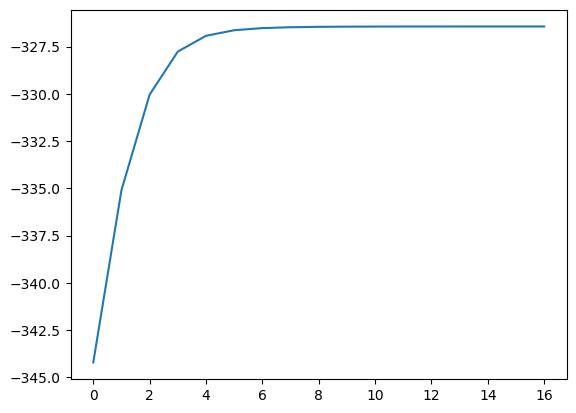

In [17]:
#plot the ELBO
plt.plot(lb_vi)

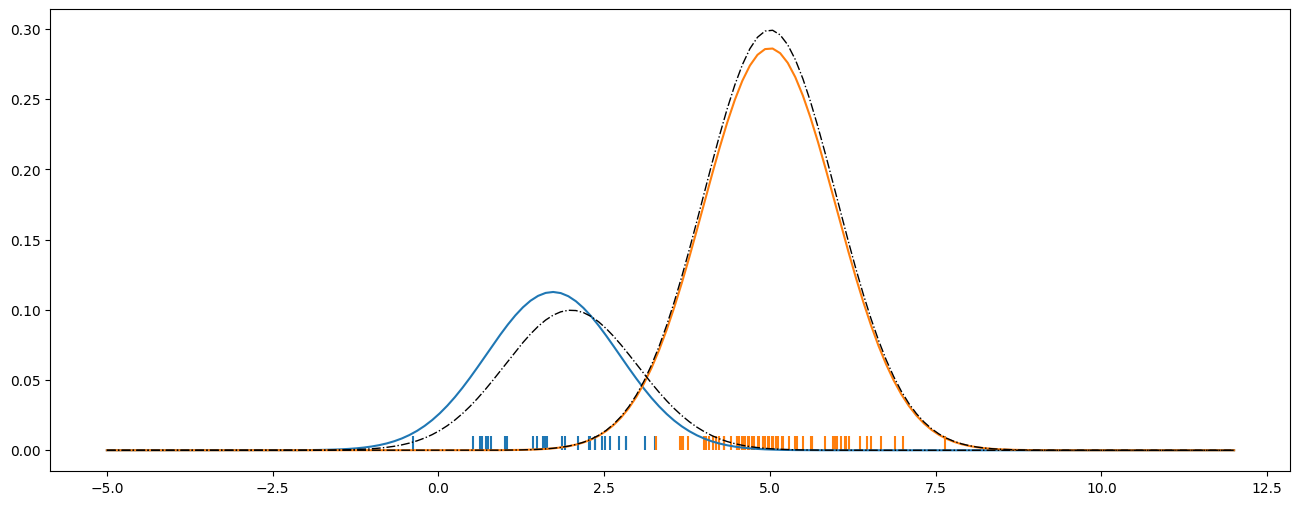

In [18]:
# this should display the fitted distribution
fitted_m_vi = [stats.norm(mu, 1) for mu in vi.means]
fitted_p_vi = vi.phi.mean(axis=1)

if fitted_p_vi[0] > fitted_p_vi[1]:
    fitted_p_vi = fitted_p_vi[::-1]
    fitted_m_vi = fitted_m_vi[::-1]

plt.figure(figsize=(16, 6))
plt.vlines(x_i, 0, 0.01, color=np.array(['C0', 'C1'])[c_i])
plt.plot(x, fitted_p_vi[0]*fitted_m_vi[0].pdf(x))
plt.plot(x, fitted_p_vi[1]*fitted_m_vi[1].pdf(x))
plt.plot(x, (1-p)*generative_m[0].pdf(x), color='black', lw=1, ls='-.')
plt.plot(x, p*generative_m[1].pdf(x), color='black', lw=1, ls='-.')